In [10]:
# 客户价值分析
#-*- coding: utf-8 -*- 
#对数据进行基本的探索
#返回缺失值个数以及最大最小值

import pandas as pd

datafile= '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/data/air_data.csv' #航空原始数据,第一行为属性标签
resultfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/tmp/explore1.xls' #数据探索结果表

data = pd.read_csv(datafile, encoding = 'utf-8') #读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）

In [11]:
explore = data.describe(percentiles = [], include = 'all').T #包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）；T是转置，转置后更方便查阅

explore['null'] = len(data)-explore['count'] #describe()函数自动计算非空值数，需要手动计算空值数

explore = explore[['null', 'max', 'min']]

explore.columns = [u'空值数', u'最大值', u'最小值'] #表头重命名
'''这里只选取部分探索结果。
describe()函数自动计算的字段有count（非空值数）、unique（唯一值数）、top（频数最高者）、freq（最高频数）、mean（平均值）、std（方差）、min（最小值）、50%（中位数）、max（最大值）'''

explore.to_excel(resultfile) #导出结果

/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_10232/2110867448.py:11: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  explore.to_excel(resultfile) #导出结果


In [12]:
#-*- coding: utf-8 -*-
#数据清洗，过滤掉不符合规则的数据

import pandas as pd

datafile= '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/data/air_data.csv' #航空原始数据,第一行为属性标签
cleanedfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/tmp/data_cleaned.csv' #数据清洗后保存的文件

data = pd.read_csv(datafile,encoding='utf-8') #读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）

data = data[data['SUM_YR_1'].notnull()*data['SUM_YR_2'].notnull()] #票价非空值才保留

#只保留票价非零的，或者平均折扣率与总飞行公里数同时为0的记录。
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0) #该规则是“与”
data = data[index1 | index2 | index3] #该规则是“或”

data.to_csv(cleanedfile) #导出结果

In [13]:
#-*- coding: utf-8 -*-
#标准差标准化

import pandas as pd

datafile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/data/zscoredata.xls' #需要进行标准化的数据文件；
zscoredfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/tmp/zscoreddata.xls' #标准差化后的数据存储路径文件；

#标准化处理
data = pd.read_excel(datafile)
data = (data - data.mean(axis = 0))/(data.std(axis = 0)) #简洁的语句实现了标准化变换，类似地可以实现任何想要的变换。
data.columns=['Z'+i for i in data.columns] #表头重命名。

data.to_excel(zscoredfile, index = False) #数据写入

/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_10232/1530316290.py:14: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel(zscoredfile, index = False) #数据写入


In [18]:
#-*- coding: utf-8 -*-
#K-Means聚类算法

import pandas as pd
from sklearn.cluster import KMeans #导入K均值聚类算法

inputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/data/zscoreddata.xls' #待聚类的数据文件
k = 5                       #需要进行的聚类类别数

#读取数据并进行聚类分析
data = pd.read_excel(inputfile) #读取数据

#调用k-means算法，进行聚类分析
kmodel = KMeans(n_clusters = k) #n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data) #训练模型

kmodel.cluster_centers_ #查看聚类中心
kmodel.labels_ #查看各样本对应的类别


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

         ZL        ZR        ZF        ZM        ZC   类别数目
0  0.039196 -0.002939 -0.238090 -0.242738  2.148715   4324
1  1.161262 -0.377594 -0.086603 -0.094414 -0.159157  15711
2 -0.701148 -0.415302 -0.159908 -0.159506 -0.260609  24568
3 -0.312805  1.687570 -0.573866 -0.536770 -0.175327  12100
4  0.483822 -0.799823  2.482272  2.423195  0.311457   5341


/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_10232/2184130177.py:12: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  r.to_excel(outputfile) #保存结果
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_10232/2184130177.py:26: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))
/var/folders/r6/jnc

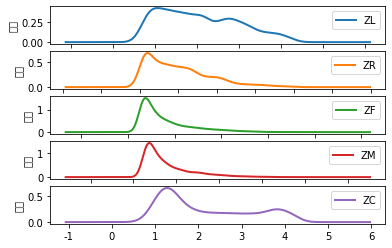

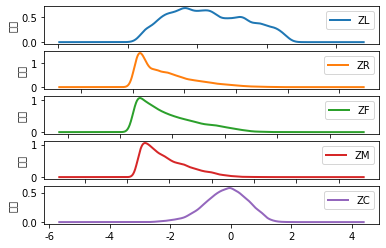

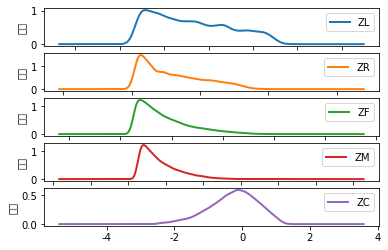

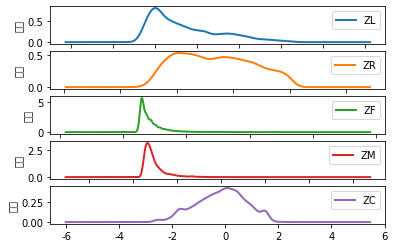

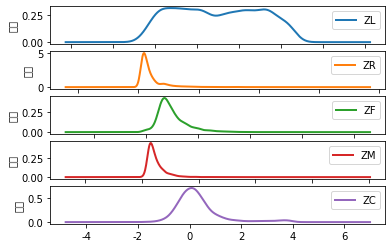

In [20]:
outputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/tmp/result.xls' #保存结果的文件名
#简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data.columns) + [u'类别数目'] #重命名表头
print(r)

#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(kmodel.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.to_excel(outputfile) #保存结果


def density_plot(data): #自定义作图函数
  import matplotlib.pyplot as plt
  plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
  p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
  [p[i].set_ylabel(u'密度') for i in range(k)]
  plt.legend()
  return plt

pic_output = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter7/demo/tmp/pd_' #概率密度图文件名前缀
for i in range(k):
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))